# In-sample RMSE for linear regression on diamonds

In [1]:
library(ggplot2)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [2]:
# Fit lm model: model
model <- lm(price~., diamonds)

# Predict on full data: p
p <- predict(model, diamonds, type="response")

# Compute errors: error
error = p-diamonds$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 1129.843


In [3]:
rm(model)

In [5]:
# Fit lm model: model
model <- lm(price~., diamonds)

# Predict on full data: p
p <- predict(model, diamonds[,-7], type="response")

# Compute errors: error
error = p-diamonds$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 1129.843


In [11]:
head(subset(diamonds, select = c(-price)))

carat,cut,color,clarity,depth,table,x,y,z
0.23,Ideal,E,SI2,61.5,55,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,3.94,3.96,2.48


# Randomly order the data frame

Instructions
Set the random seed to 42.
Make a vector of row indices called rows.
Randomly reorder the diamonds data frame.

In [ ]:
# Set seed
set.seed(42)

# Shuffle row indices: rows
rows <- sample(nrow(diamonds))

# Randomly order data
diamonds <- diamonds[rows,]

In [1]:
library(ggplot2)

In [2]:
# Determine row to split on: split
split <- round(nrow(diamonds) * .80)

# Create train
train <- diamonds[1:split,]

# Create test
test <- diamonds[(split+1):nrow(diamonds),]

In [3]:
# Fit lm model on train: model
model = lm(price~., train)

# Predict on test: p
p <- predict(model, test)

In [4]:
# Compute errors: error
error <- p-test$price

# Calculate RMSE
print(sqrt(mean(error^2)))

[1] 796.8922


# Cross-validation

In [7]:
library(caret)

Loading required package: lattice


In [8]:
# Fit lm model using 10-fold CV: model
model <- train(
  price~., diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)

# Print model to console
print(model)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set
Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48546, 48546, 48545, 48546, 48547, 48546, ... 
Resampling results:

  RMSE     Rsquared 
  1130.98  0.9196893

Tuning parameter 'intercept' was held constant at a value of TRUE
 


In [14]:
library(MASS)
data(Boston)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [16]:
# Fit lm model using 5-fold CV: model
model <- train(
  medv~., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
print(model)

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set
Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 404, 404, 406, 406, 404 
Resampling results:

  RMSE      Rsquared 
  4.840445  0.7270587

Tuning parameter 'intercept' was held constant at a value of TRUE
 


### 5 x 5-fold cross-validation

In [17]:
library(MASS)
data(Boston)
# Fit lm model using 5 x 5-fold CV: model
model <- train(
  medv ~ ., Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 5,
    repeats = 5, verboseIter = TRUE
  )
)

# Print model to console
print(model)

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set
Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 406, 405, 405, 403 
Resampling results:

  RMSE      Rsquared 
  4.768361  0.7324957

Tuning parameter 'intercept' was held constant at a value of TRUE
 


In [18]:
# Predict on full Boston dataset
predict(model, Boston)

1          2          3          4          5          6          7 
30.0038434 25.0255624 30.5675967 28.6070365 27.9435242 25.2562845 23.0018083 
         8          9         10         11         12         13         14 
19.5359884 11.5236369 18.9202621 18.9994965 21.5867957 20.9065215 19.5529028 
        15         16         17         18         19         20         21 
19.2834821 19.2974832 20.5275098 16.9114013 16.1780111 18.4061360 12.5238575 
        22         23         24         25         26         27         28 
17.6710367 15.8328813 13.8062853 15.6783383 13.3866856 15.4639765 14.7084743 
        29         30         31         32         33         34         35 
19.5473729 20.8764282 11.4551176 18.0592329  8.8110574 14.2827581 13.7067589 
        36         37         38         39         40         41         42 
23.8146353 22.3419371 23.1089114 22.9150261 31.3576257 34.2151023 28.0205641 
        43         44         45         46         47         48         49 
25.2038663 24.6097927 22.9414918 22.0966982 20.4232003 18.0365509  9.1065538 
        50         51         52         53         54         55         56 
17.2060775 21.2815254 23.9722228 27.6558508 24.0490181 15.3618477 31.1526495 
        57         58         59         60         61         62         63 
24.8568698 33.1091981 21.7753799 21.0849356 17.8725804 18.5111021 23.9874286 
        64         65         66         67         68         69         70 
22.5540887 23.3730864 30.3614836 25.5305651 21.1133856 17.4215379 20.7848363 
        71         72         73         74         75         76         77 
25.2014886 21.7426577 24.5574496 24.0429571 25.5049972 23.9669302 22.9454540 
        78         79         80         81         82         83         84 
23.3569982 21.2619827 22.4281737 28.4057697 26.9948609 26.0357630 25.0587348 
        85         86         87         88         89         90         91 
24.7845667 27.7904920 22.1685342 25.8927642 30.6746183 30.8311062 27.1190194 
        92         93         94         95         96         97         98 
27.4126673 28.9412276 29.0810555 27.0397736 28.6245995 24.7274498 35.7815952 
        99        100        101        102        103        104        105 
35.1145459 32.2510280 24.5802202 25.5941347 19.7901368 20.3116713 21.4348259 
       106        107        108        109        110        111        112 
18.5399401 17.1875599 20.7504903 22.6482911 19.7720367 20.6496586 26.5258674 
       113        114        115        116        117        118        119 
20.7732364 20.7154831 25.1720888 20.4302559 23.3772463 23.6904326 20.3357836 
       120        121        122        123        124        125        126 
20.7918087 21.9163207 22.4710778 20.5573856 16.3666198 20.5609982 22.4817845 
       127        128        129        130        131        132        133 
14.6170663 15.1787668 18.9386859 14.0557329 20.0352740 19.4101340 20.0619157 
       134        135        136        137        138        139        140 
15.7580767 13.2564524 17.2627773 15.8784188 19.3616395 13.8148390 16.4488147 
       141        142        143        144        145        146        147 
13.5714193  3.9888551 14.5949548 12.1488148  8.7282236 12.0358534 15.8208206 
       148        149        150        151        152        153        154 
 8.5149902  9.7184414 14.8045137 20.8385815 18.3010117 20.1228256 17.2860189 
       155        156        157        158        159        160        161 
22.3660023 20.1037592 13.6212589 33.2598270 29.0301727 25.5675277 32.7082767 
       162        163        164        165        166        167        168 
36.7746701 40.5576584 41.8472817 24.7886738 25.3788924 37.2034745 23.0874875 
       169        170        171        172        173        174        175 
26.4027396 26.6538211 22.5551466 24.2908281 22.9765722 29.0719431 26.5219434 
       176        177        178        179        180        181        182 
30.7220906 25.6166931 29.137409

# Logistic regression on sonar

In [19]:
library(mlbench)
data(Sonar)
head(Sonar)
dim(Sonar)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


[1] 208  61

In [20]:
# Set seed
set.seed(42)

In [21]:
# Shuffle row indices: rows
rows <- sample(nrow(Sonar))

# Randomly order data: Sonar
Sonar <- Sonar[rows,]

# Identify row to split on: split
split <- round(nrow(Sonar) * 0.6)

# Create train
train <- Sonar[1:split,]

# Create test
test <- Sonar[(split+1):nrow(Sonar),]

In [24]:
# Fit glm model: model
model <- glm(Class~., family="binomial", train)

# Predict on test: p
p <- predict(model, test, type="response")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

## Confusion matrix - Video

In [ ]:
Confusion matrix takeaways
50xp
What information does a confusion matrix provide?

Possible Answers
True positive rates
True negative rates
False positive rates
False negative rates
All of the above (Correct)

In [25]:
# Calculate class probabilities: p_class
p_class <- ifelse(p > 0.50, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  8 18
         R 40 17
                                          
               Accuracy : 0.3012          
                 95% CI : (0.2053, 0.4118)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.3204         
 Mcnemar's Test P-Value : 0.005826        
                                          
            Sensitivity : 0.16667         
            Specificity : 0.48571         
         Pos Pred Value : 0.30769         
         Neg Pred Value : 0.29825         
             Prevalence : 0.57831         
         Detection Rate : 0.09639         
   Detection Prevalence : 0.31325         
      Balanced Accuracy : 0.32619         
                                          
       'Positive' Class : M               
                                          

### Calculating accuracy

Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set accuracy of this model (rounded to the nearest percent)?

70%

### Calculating true postive rate

Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set true positive rate (or sensitivity) of this model (rounded to the nearest percent)?

83%

### Calculating true negative rate

Use confusionMatrix(p_class, test[["Class"]]) to calculate a confusion matrix on the test set.

What is the test set true negative rate (or specificity) of this model (rounded to the nearest percent)?

51%

## Class probabilities and class predictions - Video

In [ ]:
# Apply threshold of 0.9: p_class
p_class <- ifelse(p > 0.9, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

In [ ]:
# Apply threshold of 0.10: p_class
p_class <- ifelse(p > 0.1, "M","R")

# Create confusion matrix
confusionMatrix(p_class, test$Class)

## Introducing the ROC curve - Video

### Plot an ROC curve

As you saw in the video, an ROC curve is a really useful shortcut for summarizing the performance of a classifier over all possible thresholds. This saves you a lot of tedious work computing class predictions for many different thresholds and examining the confusion matrix for each.

My favorite package for computing ROC curves is caTools, which contains a function called colAUC(). This function is very user-friendly and can actually calculate ROC curves for multiple predictors at once. In this case, you only need to calculate the ROC curve for one predictor, e.g.:

colAUC(predicted_probabilities, actual, plotROC = TRUE)
The function will return a score called AUC (more on that later) and the plotROC = TRUE argument will return the plot of the ROC curve for visual inspection.

Instructions
model, test, and train from the last exercise using the sonar data are loaded in your workspace.

Predict probabilities (i.e. type = "response") on the test set, then store the result as p.
Make an ROC curve using the predicted test set probabilities.

M vs. R,0.6976608


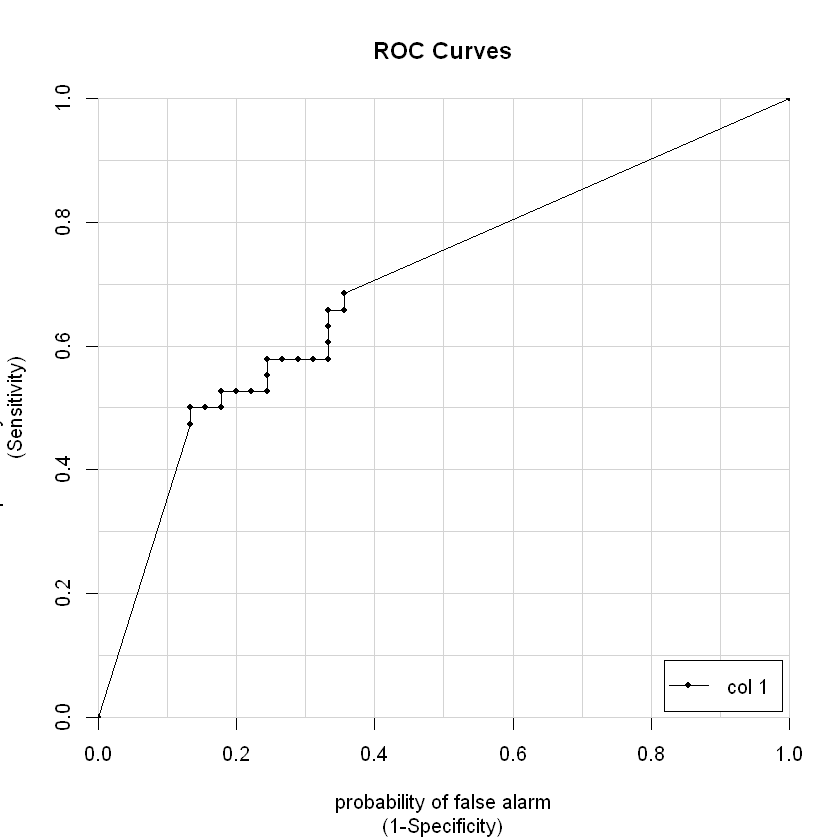

In [23]:
library(caTools)
# Predict on test: p
p <- predict(model, test, type="response")

# Make ROC curve
colAUC(p, test$Class, plotROC=TRUE)

### Area under the curve

Model, ROC, and AUC
50xp
What is the AUC of a perfect model?

Possible Answers
0.00
0.50
1.00 (Correct)

Customizing trainControl

As you saw in the video, area under the ROC curve is a very useful, single-number summary of a model's ability to discriminate the positive from the negative class (e.g. mines from rocks). An AUC of 0.5 is no better than random guessing, an AUC of 1.0 is a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (which rarely happens).

This is often a much more useful metric than simply ranking models by their accuracy at a set threshold, as different models might require different calibration steps (looking at a confusion matrix at each step) to find the optimal classification threshold for that model.

You can use the trainControl() function in caret to use AUC (instead of acccuracy), to tune the parameters of your models. The twoClassSummary() convenience function allows you to do this easily.

When using twoClassSummary(), be sure to always include the argument classProbs = TRUE or your model will throw an error! (You cannot calculate AUC with just class predictions. You need to have class probabilities as well.)

Instructions
Customize the trainControl object to use twoClassSummary rather than defaultSummary.
Use 10-fold cross-validation.
Be sure to tell trainControl() to return class probabilities.

In [26]:
# Create trainControl object: myControl
myControl <- trainControl(
  method = "cv",
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

### Using custom trainControl

Now that you have a custom trainControl object, it's easy to fit caret models that use AUC rather than accuracy to tune and evaluate the model. You can just pass your custom trainControl object to the train() function via the trControl argument, e.g.:

train(<standard arguments here>, trControl = myControl)
This syntax gives you a convenient way to store a lot of custom modeling parameters and then use them across multiple different calls to train(). You will make extensive use of this trick in Chapter 5.

Instructions
Use train() to fit a glm model (i.e. method = "glm") to Sonar using your custom trainControl object, myControl. You want to predict Class from all other variables in the data (i.e. Class ~ .). Save the result to model.
Print the model to the console and examine its output.

In [27]:
# Train glm with custom trainControl: model
model <- train(Class~.,Sonar, method="glm", trControl=myControl)


# Print model to console
print(model)

ERROR: Error in requireNamespaceQuietStop("pROC"): package pROC is required


# Random forests and wine

Fit a random forest

As you saw in the video, random forest models are much more flexible than linear models, and can model complicated nonlinear effects as well as automatically capture interactions between variables. They tend to give very good results on real world data, so let's try one out on the wine quality dataset, where the goal is to predict the human-evaluated quality of a batch of wine, given some of the machine-measured chemical and physical properties of that batch.

Fitting a random forest model is exactly the same as fitting a generalized linear regression model, as you did in the previous chapter. You simply change the method argument in the train function to be "ranger". The ranger package is a rewrite of R's classic randomForest package and fits models much faster, but gives almost exactly the same results. We suggest that all beginners use the ranger package for random forest modeling.

Instructions
Train a random forest called model on the wine quality dataset, wine, such that quality is the response variable and all other variables are explanatory variables.
Use method = "ranger".
Use a tuneLength of 1.
Use 5 CV folds.
Print model to the console.

In [29]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneLength = 1,
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

ERROR: Error in eval(expr, envir, enclos): object 'wine' not found


### Explore a wider model space

Try a longer tune length
100xp
Recall from the video that random forest models have a primary tuning parameter of mtry, which controls how many variables are exposed to the splitting search routine at each split. For example, suppose that a tree has a total of 10 splits and mtry = 2. This means that there are 10 samples of 2 predictors each time a split is evaluated.

Use a larger tuning grid this time, but stick to the defaults provided by the train() function. Try a tuneLength of 3, rather than 1, to explore some more potential models, and plot the resulting model using the plot function.

Instructions
Train a random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables. (This will take a few seconds to run, so be patient!)
Use method = "ranger".
Use a tuneLength of 3.
Use 5 CV folds.
Print model to the console.
Plot the model after fitting it.

In [34]:
library(readxl)
wine <- read_excel("wine.xlsx")
head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
6.7,0.27,0.69,1.2,0.176,36,106,0.99288,2.96,0.43,9.2,6,white
6.7,0.48,0.49,2.9,0.030,28,122,0.98926,3.13,0.40,13.0,6,white
5.8,0.36,0.38,0.9,0.037,3,75,0.99040,3.28,0.34,11.4,4,white
6.3,0.32,0.26,12.0,0.049,63,170,0.99610,3.14,0.55,9.9,6,white
6.6,0.24,0.28,1.8,0.028,39,132,0.99182,3.34,0.46,11.4,5,white
7.8,0.39,0.26,9.9,0.059,33,181,0.99550,3.04,0.42,10.9,6,white


In [35]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneLength = 3,
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

# Plot model
plot(model)

1 package is needed for this model and is not installed. (ranger). Would you like to try to install it now?

ERROR: Error in checkInstall(models$library): 


### Custom tuning grids

Fit a random forest with custom tuning
100xp
Now that you've explored the default tuning grids provided by the train() function, let's customize your models a bit more.

You can provide any number of values for mtry, from 2 up to the number of columns in the dataset. In practice, there are diminishing returns for much larger values of mtry, so you will use a custom tuning grid that explores 2 simple models (mtry = 2 and mtry = 3) as well as one more complicated model (mtry = 7).

Instructions
Train another random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables.
Use method = "ranger".
Use a custom tuneGrid with data.frame(mtry = c(2, 3, 7)).
Use 5 CV folds.
Print model to the console.
Plot the model after fitting it using plot().

In [ ]:
# Fit random forest: model
model <- train(
  quality~.,
  tuneGrid = data.frame(mtry = c(2, 3, 7)),
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)

# Print model to console
print(model)

# Plot model

## Introducing glmnet - Video

Advantage of glmnet
50xp
What's the advantage of glmnet over regular glm models?

Possible Answers
- glmnet models automatically find interaction variables.
- glmnet models don't provide p-values or confidence intervals on predictions.
- glmnet models place constraints on your coefficients, which helps prevent overfitting. (Correct)

Make a custom trainControl
100xp
The wine quality dataset was a regression problem, but now you are looking at a classification problem. This is a simulated dataset based on the "don't overfit" competition on Kaggle a number of years ago.

Classification problems are a little more complicated than regression problems because you have to provide a custom summaryFunction to the train() function to use the AUC metric to rank your models. Start by making a custom trainControl, as you did in the previous chapter. Be sure to set classProbs = TRUE, otherwise the twoClassSummary for summaryFunction will break.

Instructions
Make a custom trainControl called myControl for classification using the trainControl function.

Use 10 CV folds.
Use twoClassSummary for the summaryFunction.
Be sure to set classProbs = TRUE.

In [ ]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

Fit glmnet with custom trainControl
100xp
Now that you have a custom trainControl object, fit a glmnet model to the "don't overfit" dataset. Recall from the video that glmnet is an extention of the generalized linear regression model (or glm) that places constraints on the magnitude of the coefficients to prevent overfitting. This is more commonly known as "penalized" regression modeling and is a very useful technique on datasets with many predictors and few values.

glmnet is capable of fitting two different kinds of penalized models, controlled by the alpha parameter:

Ridge regression (or alpha = 0)
Lasso regression (or alpha = 1)
You'll now fit a glmnet model to the "don't overfit" dataset using the defaults provided by the caret package.

Instructions
Train a glmnet model called model on the overfit data. Use the custom trainControl from the previous exercise (myControl). The variable y is the response variable and all other variables are explanatory variables.
Print the model to the console.
Use the max() function to find the maximum of the ROC statistic contained somewhere in model[["results"]].

In [ ]:
# Fit glmnet model: model
model <- train(
  y~., data=overfit,
  method = "glmnet",
  trControl = myControl
)

# Print model to console
print(model)

# Print maximum ROC statistic
print(max(model[["results"]]))

### glmnet with custom tuning grid

glmnet with custom trainControl and tuning
100xp
As you saw in the video, the glmnet model actually fits many models at once (one of the great things about the package). You can exploit this by passing a large number of lambda values, which control the amount of penalization in the model. train() is smart enough to only fit one model per alpha value and pass all of the lambda values at once for simultaneous fitting.

My favorite tuning grid for glmnet models is:

expand.grid(alpha = 0:1,
  lambda = seq(0.0001, 1, length = 100))
This grid explores a large number of lambda values (100, in fact), from a very small one to a very large one. (You could increase the maximum lambda to 10, but in this exercise 1 is a good upper bound.)

If you want to explore fewer models, you can use a shorter lambda sequence. For example, lambda = seq(0.0001, 1, length = 10) would fit 10 models per value of alpha.

You also look at the two forms of penalized models with this tuneGrid: ridge regression and lasso regression. alpha = 0 is pure ridge regression, and alpha = 1 is pure lasso regression. You can fit a mixture of the two models (i.e. an elastic net) using an alpha between 0 and 1. For example, alpha = .05 would be 95% ridge regression and 5% lasso regression.

In this problem you'll just explore the 2 extremes--pure ridge and pure lasso regression--for the purpose of illustrating their differences.

Instructions
Train a glmnet model on the overfit data such that y is the response variable and all other variables are explanatory variables. Make sure to use your custom trainControl from the previous exercise (myControl). Also, use a custom tuneGrid to explore alpha = 0:1 and 20 values of lambda between 0.0001 and 1 per value of alpha.
Print model to the console.
Print the max() of the ROC statistic in model[["results"]]. You can access it using model[["results"]][["ROC"]].

In [ ]:
# Train glmnet with custom trainControl and tuning: model
model <- train(
  y~., overfit,
  tuneGrid = expand.grid(alpha = 0:1,lambda = seq(0.0001,1,length = 20)),
  method = "glmnet",
  trControl = myControl
)

# Print model to console
print(model)

# Print maximum ROC statistic
print(max(model[["results"]][["ROC"]]))

# Median imputation - Video

Apply median imputation
100xp
In this chapter, you'll be using a version of the Wisconsin Breast Cancer dataset. This dataset presents a classic binary classification problem: 50% of the samples are benign, 50% are malignant, and the challenge is to identify which are which.

This dataset is interesting because many of the predictors contain missing values and most rows of the dataset have at least one missing value. This presents a modeling challenge, because most machine learning algorithms cannot handle missing values out of the box. For example, your first instinct might be to fit a logistic regression model to this data, but prior to doing this you need a strategy for handling the NAs.

Fortunately, the train() function in caret contains an argument called preProcess, which allows you to specify that median imputation should be used to fill in the missing values. In previous chapters, you created models with the train() function using formulas such as y ~ .. An alternative way is to specify the x and y arguments to train(), where x is an object with samples in rows and features in columns and y is a numeric or factor vector containing the outcomes. Said differently, x is a matrix or data frame that contains the whole dataset you'd use for the data argument to the lm() call, for example, but excludes the response variable column; y is a vector that contains just the response variable column.

For this exercise, the argument x to train() is loaded in your workspace as breast_cancer_x and y as breast_cancer_y.

Instructions
Use the train() function to fit a glm model called model to the breast cancer dataset. Use preProcess = "medianImpute" to handle the missing values.
Print model to the console.

In [ ]:
# Apply median imputation: model
model <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print model to console
print(model)

### KNN imputation

Use KNN imputation
100xp
In the previous exercise, you used median imputation to fill in missing values in the breast cancer dataset, but that is not the only possible method for dealing with missing data.

An alternative to median imputation is k-nearest neighbors, or KNN, imputation. This is a more advanced form of imputation where missing values are replaced with values from other rows that are similar to the current row. While this is a lot more complicated to implement in practice than simple median imputation, it is very easy to explore in caret using the preProcess argument to train(). You can simply use preProcess = "knnImpute" to change the method of imputation used prior to model fitting.

Instructions
breast_cancer_x and breast_cancer_y are loaded in your workspace.

Use the train() function to fit a glm model called model2 to the breast cancer dataset.
Use KNN imputation to handle missing values.

In [ ]:
# Apply KNN imputation: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "knnImpute"
)

# Print model to console
print(model2)

### Multiple preprocessing methods

Combining preprocessing methods

The preProcess argument to train() doesn't just limit you to imputing missing values. It also includes a wide variety of other preProcess techniques to make your life as a data scientist much easier. You can read a full list of them by typing ?preProcess and reading the help page for this function.

One set of preprocessing functions that is particularly useful for fitting regression models is standardization: centering and scaling. You first center by subtracting the mean of each column from each value in that column, then you scale by dividing by the standard deviation.

Standardization transforms your data such that for each column, the mean is 0 and the standard deviation is 1. This makes it easier for regression models to find a good solution.

Instructions
breast_cancer_x and breast_cancer_y are loaded in your workspace. Fit two models called model1 and model2 to the breast cancer data, then print each to the console:

A logistic regression model using only median imputation: model1
A logistic regression model using median imputation, centering, and scaling (in that order): model2

In [ ]:
# Fit glm with median imputation: model1
model1 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print model1
print(model1)

# Fit glm with median imputation and standardization: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute","center", "scale")
)

# Print model2
print(model2)

### Handling low-information predictors

In [ ]:
# Identify near zero variance predictors: remove_cols
remove_cols <- nearZeroVar(bloodbrain_x, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)

# Get all column names from bloodbrain_x: all_cols
all_cols <- names(bloodbrain_x)

# Remove from data: bloodbrain_x_small
bloodbrain_x_small <- bloodbrain_x[ , setdiff(all_cols, remove_cols)]

In [ ]:
# Fit model on reduced data: model
model <- train(x = bloodbrain_x_small, y = bloodbrain_y, method = "glm")

# Print model to console
print(model)

### Principle components analysis (PCA)

In [ ]:
# Fit glm model using PCA: model
model <- train(
  x = bloodbrain_x, y = bloodbrain_y,
  method = "glm", preProcess = "pca"
)

# Print model to console
print(model)

# Case Study

# Reusing a trainControl

In [ ]:
# Create custom indices: myFolds
myFolds <- createFolds(churn_y, k = 5)

# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

### Reintroduce glmnet

In [ ]:
# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)

### Reintroduce random forest

In [ ]:
# Fit random forest: model_rf
model_rf <- train(
  x = churn_x, y = churn_y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

### Comparing models

In [ ]:
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)

# Pass model_list to resamples(): resamples
resamples <- resamples(model_list)

# Summarize the results
summary(resamples)

### More on resamples 

In [ ]:
# Create bwplot
bwplot(resamples, metric="ROC")

In [ ]:
# Create xyplot
xyplot(resamples, metric="ROC")

In [ ]:
# Create ensemble model: stack
stack <- caretStack(model_list , method = "glm")

# Look at summary
summary(stack)